# Ch 8 - Advanced Topics in Probability and Statistics

This notebook contains python code for generating figures in the Chapter 8 of the book _Mathematics in Biology_.

In [29]:
import numpy as np
import random
from random import seed

from pathlib import Path
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import poisson, binom, t, norm, chi2, uniform, expon
from scipy import special

from mib.utils import plot, hist

# set font to be used in figures
import matplotlib.font_manager as font_manager
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'serif';
cmfont = font_manager.FontProperties(fname=matplotlib.get_data_path() + '/fonts/ttf/cmr10.ttf');
matplotlib.rcParams['font.serif']=cmfont.get_name();
matplotlib.rcParams['axes.formatter.use_mathtext'] = True
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams['font.size'] = 11

Save = False # set to True if you are saving figures to a local drive
if Save:
    # set path to save the figures
    savedir = Path('../img')
    savedir.mkdir(parents=True, exist_ok=True)

datadir = Path('data')

### Random walks and diffusion


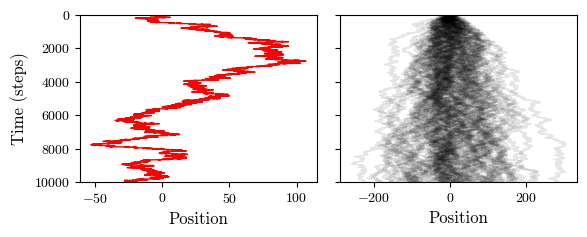

In [2]:
import random
random.seed(5) # choose random seed
n=10000 # number of steps per trajectory
p=0.5 # bias = prob of step=+1
m=100 # number of trajectories
pos=[np.cumsum(random.choices([1,-1],weights=[p,1-p],k=n)) for i in range(m)] # simulate m random walks of n steps
fig,ax=plt.subplots(1,2,figsize=(6,2.5))
t=np.arange(n) # time axis
plot(pos[0],t,fmts=['r-'],linewidth=1,
     ylabel='Time (steps)',xlabel='Position',ylim=[n,0], axes=ax[0]);
plot(pos,[t for i in range(m)],fmts=['k-']*len(pos),linewidth=1,alpha=0.1,
     # ylabel='Time (steps)',
     xlabel='Position',ylim=[n,0], axes=ax[1]);
ax[1].set_yticklabels([]);
# fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
if Save:
    fig.savefig(str(savedir / 'Random-walk.pdf'), dpi=600, format='pdf', bbox_inches='tight');

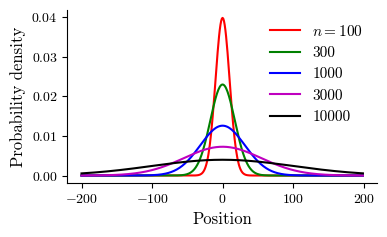

In [3]:
# Gaussian distribution parametric in time
p=0.5
x=np.arange(-200,200,1)
n=[100,300,1000,3000,10000]
y=[1/np.sqrt(2*np.pi*4*t*p*(1-p))*np.exp(-x*x/(2*4*t*p*(1-p))) for t in n]
fig, ax = plt.subplots(figsize=(4,2.5))
plot(x,y,fmts=['r-','g-','b-','m-','k-'], linewidth=1.5, 
     legend=['$n=${}'.format(n[0])]+n[1:],
     xlabel='Position',ylabel='Probability density', axes=ax);
ax.legend_.set_frame_on(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# fig.tight_layout()
if Save:
    fig.savefig(str(savedir / 'Random-walk-Gaussian.pdf'), dpi=600, format='pdf', bbox_inches='tight');

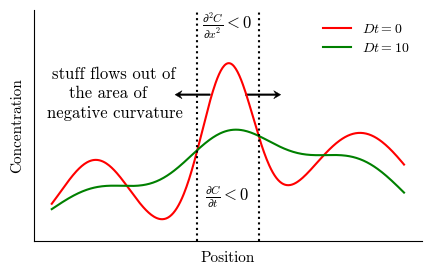

In [4]:
def Gauss(x,m,s):
    return np.exp(-(x-m)**2/(2*s**2))/(np.sqrt(2*np.pi)*s)
D=1 # Diffusion coefficient
dx=0.1 # resolution on position
x=np.arange(-20,20+dx,dx)
f=0.5*Gauss(x,-15,4)+0.8*Gauss(x,0,3)+1*Gauss(x,15,6)
t=10
s=np.sqrt(2*D*t)
h=Gauss(x,0,s)
g=np.convolve(f,h,mode='same')*dx # convolution integral
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(x,f,'r-',label='Initial')
ax.plot(x,g,'g-',label='Final')
ax.set_xlabel('Position')
ax.set_ylabel('Concentration')

ax.set_ylim([0,1.3*max(f)])
ax.set_yticks([])
ax.set_xticks([])

ax.text(-2.9,0.13,r'$\frac{\partial^2 C}{\partial x^2}<0$',fontsize=12,color='k')
ax.text(-2.6,0.025,r'$\frac{\partial C}{\partial t}<0$',fontsize=12,color='k')
ax.text(-20,0.1,'stuff flows out of',fontsize=12,color='k')
ax.text(-18,0.088,'the area of',fontsize=12,color='k')
ax.text(-20.5,0.076,'negative curvature',fontsize=12,color='k')
ax.plot([-3.5,-3.5],[0,0.16],'k',linestyle='dotted')
ax.plot([3.5,3.5],[0,0.16],'k',linestyle='dotted')
ax.arrow(2,0.09,4,0,width=0.001,length_includes_head=True,linewidth=0.3,head_width=0.005,head_length=0.8,
                overhang=0.3,color='k')
ax.arrow(-2,0.09,-4,0,width=0.001,length_includes_head=True,linewidth=0.3,head_width=0.005,head_length=0.8,
                overhang=0.3,color='k')
ax.legend(['$Dt=0$','$Dt=10$'], fontsize = 10, frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

if Save:
    fig.savefig(str(savedir / 'diff-eqn-qual-2.pdf'), dpi=600, format='pdf', bbox_inches='tight');

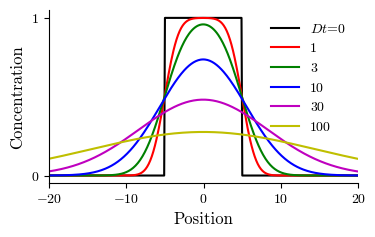

In [5]:
def Green(x,Dt):
    return np.exp(-x**2/(4*Dt))/np.sqrt(4*np.pi*Dt)

dx=0.1 # resolution on position
DtList=[1,3,10,30,100] # values of Dt
x=np.arange(-50,50+dx,dx) # x-axis
f=np.where(np.logical_and(x>-5,x<5),1,0) # initial condition
g=[np.convolve(f,Green(x,Dt),mode='same')*dx for Dt in DtList] # convolution integral
fig, ax = plt.subplots(figsize=(4,2.5))
plot(x,[f]+g,fmts=['k-','r-','g-','b-','m-','y-'],linewidth=1.5, xlabel='Position',ylabel='Concentration',
    # legend=['$Dt$=0']+DtList, 
    xlim=[-20,20],
    axes=ax);
# Move the legend to the right
ax.legend(['$Dt$=0']+DtList, loc='upper right', bbox_to_anchor=(1.0, 1), frameon=False, fontsize=10)
ax.set_yticks([0,1])

# fig.tight_layout()
# ax.legend_.set_frame_on(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
if Save:
    fig.savefig(str(savedir / 'diff-hat.pdf'), dpi=600, format='pdf', bbox_inches='tight');

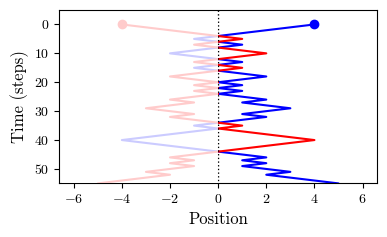

In [6]:
random.seed(5) # choose random seed
n=100 # number of steps per trajectory
p=0.5 # bias = prob of step=+1
x=5+np.cumsum(random.choices([1,-1],weights=[p,1-p],k=n)) # simulate one random walk
y=np.arange(n)
fig, ax = plt.subplots(figsize=(4,2.5))
plot([x,-x],[y,y],fmts=['b-','r-'],linewidth=1.5, ylabel='Time (steps)',xlabel='Position', axes=ax)
plot([0,0],[-5,105],fmts=['k:'],linewidth=1,axes=ax);
plot([x[0]],[y[0]],fmts=['bo'],markersize=6,axes=ax);
plot([-x[0]],[y[0]],fmts=['ro'],markersize=6,ylim=[55,-5],axes=ax);
ax.add_patch(Rectangle((-6.5,-3),6.5,106,facecolor="white",zorder=3,alpha=0.8));
# fig.tight_layout()
if Save:
    fig.savefig(str(savedir / 'mirror-sources.pdf'), dpi=600, format='pdf', bbox_inches='tight');

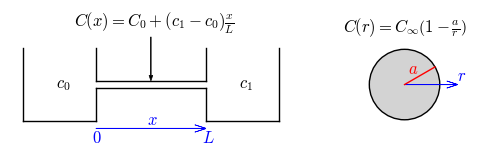

In [7]:
from matplotlib.patches import Rectangle, Circle

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(6, 2), gridspec_kw={'width_ratios': [2, 1]})

ax.plot([0,0],[0,2],'k',linewidth=1)
ax.plot([0,2],[0,0],'k',linewidth=1)
ax.plot([2,2],[0,0.9],'k',linewidth=1)
ax.plot([2,2],[1.1,2],'k',linewidth=1)

ax.plot([5,5],[0,0.9],'k',linewidth=1)
ax.plot([5,5],[1.1,2],'k',linewidth=1)
ax.plot([5,7],[0,0],'k',linewidth=1)
ax.plot([7,7],[0,2],'k',linewidth=1)

ax.plot([2,5],[0.9,0.9],'k',linewidth=1)
ax.plot([2,5],[1.1,1.1],'k',linewidth=1)

ax.arrow(2,-0.2,3,0,width=0.01,length_includes_head=True,head_width=0.2,
                overhang=1,color='b',linewidth=0.5)
ax.text(3.4,-0.1,r'$x$',fontsize=12,color='b')
ax.text(1.9,-0.6,r'$0$',fontsize=12,color='b')
ax.text(4.9,-0.6,r'$L$',fontsize=12,color='b')
ax.text(1.4,2.6,r'$C(x)=C_0+(c_1-c_0) \frac{x}{L}$',fontsize=12,color='k')
ax.text(0.9,0.9,r'$c_0$',fontsize=12,color='k')
ax.text(5.9,0.9,r'$c_1$',fontsize=12,color='k')
ax.arrow(3.5,2.3,0,-1.2,width=0.01,length_includes_head=True,head_width=0.1,
                overhang=0,color='k',linewidth=0.5)

ax.axis("off");

ax1.add_patch(Circle((0, 0),1,edgecolor='k',facecolor='lightgray'))

ax1.arrow(0,0,1.5,0,width=0.01,length_includes_head=True,head_width=0.2,
                overhang=1,color='b',linewidth=0.5)
ax1.plot([0,np.cos(np.pi/6)],[0,np.sin(np.pi/6)],'r-',linewidth=1)
ax1.text(0.1,0.3,r'$a$',fontsize=12,color='r')
ax1.text(1.5,0.1,r'$r$',fontsize=12,color='b')
ax1.text(0,1.3,r'$C(r)=C_\infty\left(1-\frac{a}{r}\right)$',fontsize=12,color='k',ha='center',va='bottom')
ax1.axis("off");

ax1.set_xlim([-2,2])
ax1.set_ylim([-2,2])

ax.set_aspect('equal')
ax1.set_aspect('equal')

if Save:
    fig.savefig(str(savedir / 'DiffExamples.pdf'), dpi=600, format='pdf', bbox_inches='tight');

### Random time series

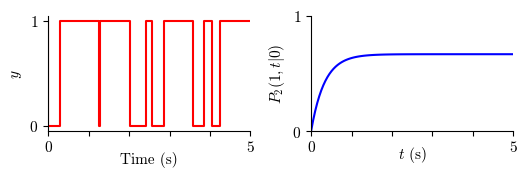

In [8]:
fig,axes=plt.subplots(1,2,figsize=(6,1.5))
np.random.seed(2)
n=10 # number of switches to 1 and back to 0
a01=2
a10=1
t01=np.random.exponential(1/a01,10)
t10=np.random.exponential(1/a10,10)
t=[u for v in zip(t01,t10) for u in v] # time of the switches
t=np.cumsum(t)
x=[0,0]+[u for u in t for _ in (0, 1)]
y=[1,0]+[0,1,1,0]*n

ax=axes[0]
ax.plot(x, y, 'r-', linewidth=1.5)
ax.set_xlabel(r'Time (s)')
ax.set_ylabel(r'$y$')
ax.yaxis.set_label_coords(-0.12, 0.5)  # Adjust the position of the ylabel
ax.xaxis.set_label_coords(0.5, -0.18)  # Adjust the position of the xlabel
ax.set_xlim([0,5])
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(['0','','','','','5']);
ax.set_yticks([0,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

x=np.linspace(0,5,100)
y=a01/(a01+a10)*(1-np.exp(-(a01+a10)*x))

ax=axes[1]
ax.plot(x, y, 'b-', linewidth=1.5)
ax.set_xlabel(r'$t$ (s)')
ax.xaxis.set_label_coords(0.5, -0.12)  # Adjust the position of the xlabel
ax.set_ylabel(r'${P_2} \left(1,t \vert 0 \right)$')
ax.yaxis.set_label_coords(-0.12, 0.5)  # Adjust the position of the xlabel
ax.set_ylim([0,1])
ax.set_xlim([0,5])
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(['0','','','','','5'])
ax.set_yticks([0,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.subplots_adjust(wspace=0.3)

if Save:
    fig.savefig(str(savedir / 'random_telegraph.pdf'), dpi=600, format='pdf', bbox_inches='tight');

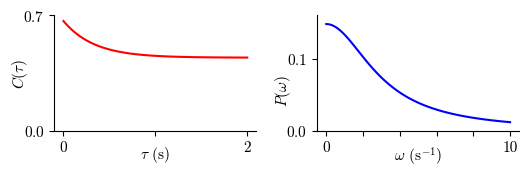

In [9]:
fig,axes=plt.subplots(1,2,figsize=(6,1.5))

np.random.seed(2)
a01=2
a10=1
a=a01+a10
b=a01/a
ti=np.linspace(0,2,100) # time
C=b*(b+(1-b)*np.exp(-a*ti))
om=np.linspace(0,10,100) # omega
P=2*b*(1-b)*a/(a**2+om**2)

ax=axes[0]
ax.plot(ti,C,'r-',linewidth=1.5)
ax.set_xlabel(r'$\tau$ (s)')
ax.xaxis.set_label_coords(0.5, -0.12)  # Adjust the position of the xlabel
ax.set_ylabel(r'$C(\tau)$')
ax.yaxis.set_label_coords(-0.12, 0.5)  # Adjust the position of the ylabel
ax.set_xticks([0,1,2])
ax.set_xticklabels(['0','','2'])
ax.set_yticks([0,0.7])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax=axes[1]
ax.plot(om,P,'b-',linewidth=1.5)
ax.set_xlabel(r'$\omega$ (s$^{-1}$)')
ax.xaxis.set_label_coords(0.5, -0.12)  # Adjust the position of the xlabel
ax.set_ylabel(r'$P(\omega)$')
ax.yaxis.set_label_coords(-0.12, 0.35)  # Adjust the position of the ylabel
ax.set_ylim([0,0.16])
ax.set_xticks([0,2,4,6,8,10])
ax.set_xticklabels(['0','','','','','10'])
ax.set_yticks([0,0.1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.subplots_adjust(wspace=0.3)

if Save:
    fig.savefig(str(savedir / 'rand-tele-corr.pdf'), dpi=600, format='pdf', bbox_inches='tight');

### Hidden Markov models

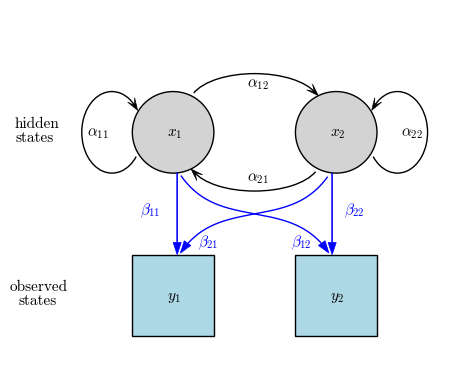

<Figure size 640x480 with 0 Axes>

In [10]:
from matplotlib.patches import Rectangle, Circle, Arc
import math

fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.text(-1.44,2.55,r'hidden',color='k')
ax.text(-1.43,2.38,r'states',color='k')
ax.text(-1.5,0.55,r'observed',color='k')
ax.text(-1.4,0.38,r'states',color='k')
ax.add_patch(Circle((0.5, 2.5),0.5,edgecolor='k',facecolor='lightgray'))
ax.add_patch(Circle((2.5, 2.5),0.5,edgecolor='k',facecolor='lightgray'))
ax.text(0.42,2.45,r'$x_1$',color='k')
ax.text(2.42,2.45,r'$x_2$',color='k')
ax.add_patch(Rectangle((0, 0), 1, 1,edgecolor='k',facecolor='lightblue'))
ax.add_patch(Rectangle((2, 0), 1, 1,edgecolor='k',facecolor='lightblue'))
ax.text(0.42,0.45,r'$y_1$',color='k')
ax.text(2.42,0.45,r'$y_2$',color='k')
ax.arrow(0.55,2,0,-1,width=0.01,length_includes_head=True,head_width=0.1,
                overhang=0,color='b',linewidth=0.5)
ax.arrow(2.45,2,0,-1,width=0.01,length_includes_head=True,head_width=0.1,
                overhang=0,color='b',linewidth=0.5)
ax.text(0.1,1.5,r'$\beta_{11}$',color='b')
ax.text(2.6,1.5,r'$\beta_{22}$',color='b')

ax.add_patch(Arc((-0.25,2.5), 2*0.37, 1, angle=0.0, theta1=45, theta2=315.0,edgecolor='k'))
ax.add_patch(Arc((3.25,2.5), 2*0.37, 1, angle=0.0, theta1=225, theta2=135.0,edgecolor='k'))
ax.arrow(0.015,2.85,0.05,-0.08,width=0.01,length_includes_head=True,head_width=0.1,
                overhang=0.5,color='k',linewidth=0.5)
ax.arrow(3-0.015,2.85,-0.05,-0.08,width=0.01,length_includes_head=True,head_width=0.1,
                overhang=0.5,color='k',linewidth=0.5)
ax.add_patch(Arc((1.5,2.15), 1.6, 2*0.37,  angle=0.0, theta1=190, theta2=350,edgecolor='k'))
ax.arrow(0.77,2,-0.05,0.05,width=0.01,length_includes_head=True,head_width=0.1,
                overhang=0.5,color='k',linewidth=0.5)
ax.add_patch(Arc((1.5,2.85), 1.6, 2*0.37,  angle=0.0, theta1=10, theta2=170,edgecolor='k'))
ax.arrow(2.23,3,0.05,-0.05,width=0.01,length_includes_head=True,head_width=0.1,
                overhang=0.5,color='k',linewidth=0.5)

ax.text(1.4,3.05,r'$\alpha_{12}$',color='k')
ax.text(1.4,1.9,r'$\alpha_{21}$',color='k')
ax.text(-0.55,2.45,r'$\alpha_{11}$',color='k')
ax.text(3.3,2.45,r'$\alpha_{22}$',color='k')

x=np.arange(0.6,2.4,0.01)
y=np.sinh(3*(x-1.5))/16+1.5
y2=-np.sinh(3*(x-1.5))/16+1.5

ax.plot(x,y,'b',linewidth=1)
ax.arrow(0.64,1.09,-0.05,-0.07,width=0.01,length_includes_head=True,head_width=0.1,
                overhang=0,color='b',linewidth=0.5)

ax.plot(x,y2,'b',linewidth=1)
ax.arrow(2.36,1.09,0.05,-0.07,width=0.01,length_includes_head=True,head_width=0.1,
                overhang=0,color='b',linewidth=0.5)

ax.text(1.95,1.1,r'$\beta_{12}$',color='b')
ax.text(0.8,1.1,r'$\beta_{21}$',color='b')

ax.set_xlim([-1.5,4])
ax.set_ylim([-0.5,4])
ax.set_aspect('equal')
ax.axis("off")
fig.tight_layout()

fig1=plt.gcf()
plt.show()
plt.draw()

if Save:
    fig1.savefig(str(savedir / 'HMMschema.pdf'), dpi=600, format='pdf', bbox_inches='tight');
    fig1.savefig(str(savedir / 'HMMschema.svg'), dpi=600, format='svg', bbox_inches='tight');

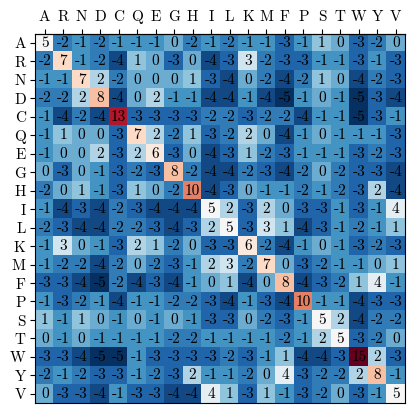

In [11]:
from scipy.stats import zscore
from sklearn.decomposition import PCA

X=np.load(str(datadir / "blosum50.npz"))

fig,a1=plt.subplots(1,1)
a1.imshow(X['blo_mat'][0:20,0:20], cmap="RdBu_r");

secax = a1.secondary_xaxis('top');
secax.set_xticks(np.arange(len(X['aa_names'])-3));
a1.set_yticks(np.arange(len(X['aa_names'])-3));
secax.set_xticklabels(X['aa_names'][0:20]);
a1.set_yticklabels(X['aa_names'][0:20]);
a1.axes.get_xaxis().set_visible(False);
for i in range(len(X['aa_names'])-3):
    for j in range(len(X['aa_names'])-3):
        texts=a1.text(i, j, int(X['blo_mat'][i,j]),ha="center", va="center", color="k");
        
if Save:
    fig.savefig(str(savedir / 'BLOSUM-50.pdf'), dpi=600, format='pdf', bbox_inches='tight');

### Dimensionality reduction

#### Principal component analysis

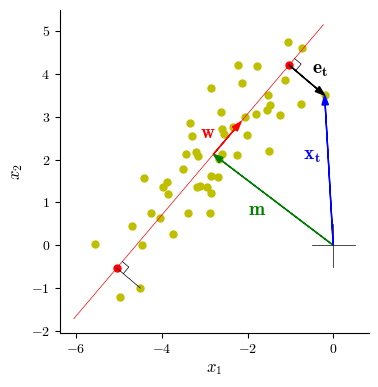

In [12]:
def Cov(X):
    '''
    Computes sample covariance of data in X
    X[i] = i-th data point
    '''
    m=X.shape[0] # number of data points
    n=X.shape[1] # dimensionality of the data
    M=np.mean(X,axis=0) # mean of the data
    C=np.zeros((n,n))
    for i in range(m):
        C+=np.outer(X[i]-M,X[i]-M)
    C/=m
    return C

T=50 # number of data points
rs=0 # random seed
np.random.seed(rs)
xm=-3 # x mean
ym=2 # ymean
x=xm+np.random.randn(T)
y=(x-xm)*1+ym+0.8*np.random.randn(T) # slope of 1
X=np.array([[x,y] for x,y in zip(x,y)]) # data matrix
X[-1]=[-0.2,3.5] # specify the last data point for convenient annotation
X[-2]=[-4.5,-1] # another data point
M=np.mean(X,axis=0) # mean of the data cloud
C=Cov(X) # covariance matrix
w,v=np.linalg.eigh(C) # eigenvalues & vectors in ascending order
P=v[-1] # first PC
if P[0]<0: # make it point up and to the right
    P*=-1
fig, ax = plt.subplots(figsize=(4,4))
plot(X[:,0],X[:,1],equal=True,fmts=['yo'],
    xlim=[-6,1],ylim=[-1,6],axes=ax,
    xlabel=r'$x_1$',ylabel=r'$x_2$',
);
ax.arrow(0,0,M[0],M[1],head_width=0.15,color='g',length_includes_head=True,zorder=10);
ax.arrow(M[0],M[1],P[0],P[1],head_width=0.15,color='r',length_includes_head=True,zorder=10);
xr=np.array([np.min(x)-0.5,np.max(x)+0.5]) # x range for the PC line
yr=M[1]+(xr-M[0])*P[1]/P[0] # y for the PC line
plot(xr,yr,fmts=['r-'],linewidth=0.5,axes=ax)
plot([-.5,.5],[0,0],fmts=['k-'],linewidth=0.5,axes=ax)
plot([0,0],[-.5,.5],fmts=['k-'],linewidth=0.5,axes=ax)

S=X[-1] # sample point for annotation
ax.arrow(0,0,S[0],S[1],head_width=0.15,color='b',length_includes_head=True,zorder=10);
A=M+(P@(S-M))*P # approximation to the sample point on the PC line
E=S-A # error for that sample
plot([A[0]],[A[1]],fmts=['ro'],markersize=5,axes=ax)
ax.arrow(A[0],A[1],E[0],E[1],head_width=0.15,color='k',length_includes_head=True,zorder=10);
r=np.array([A+0.2*P,A+0.2*P+0.2*E/np.sqrt(np.dot(E,E)),A+0.2*E/np.sqrt(np.dot(E,E))]) # right angle symbol
plot(r[:,0],r[:,1],fmts=['k-'],linewidth=0.5,axes=ax);

S=X[-2] # sample point for annotation
# ax.arrow(0,0,S[0],S[1],head_width=0.15,color='b',length_includes_head=True,zorder=10);
A=M+(P@(S-M))*P # approximation to the sample point on the PC line
E=S-A # error for that sample
plot([A[0]],[A[1]],fmts=['ro'],markersize=5,axes=ax)
plot([A[0],S[0]],[A[1],S[1]],fmts=['k-'],linewidth=0.5,axes=ax)
r=np.array([A+0.2*P,A+0.2*P+0.2*E/np.sqrt(np.dot(E,E)),A+0.2*E/np.sqrt(np.dot(E,E))]) # right angle symbol
plot(r[:,0],r[:,1],fmts=['k-'],linewidth=0.5,axes=ax);

ax.text(-2,0.7,r'$\bf{m}$',fontsize=14,color='green');
ax.text(-3.1,2.5,r'$\bf{w}$',fontsize=14,color='red');
ax.text(-0.7,2,r'$\bf{x}_t$',fontsize=14,color='blue');
ax.text(-0.5,4,r'$\bf{e}_t$',fontsize=14,color='black');

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# fig.tight_layout()

if Save:
    fig.savefig(str(savedir / 'pca-cloud.svg'), dpi=600, format='svg', bbox_inches='tight');

In [13]:
# import math
# from random import seed
# from random import random
# from random import randint
# from scipy.linalg import lstsq

# seed(9)
# N=50
# data=np.empty((2,N))
# for i in range(N):
#     xnew=random()*10
#     data[0,i]=xnew
#     ynew=xnew - 50 + random()*6
#     data[1,i]=ynew

# fig, ax = plt.subplots(figsize=(5,3))

# data[0,:]=data[0,:]-np.mean(data[0,:])
# data[1,:]=data[1,:]-np.mean(data[1,:])

# ax.scatter(data[0,:],data[1,:],5,'k');
# x=np.asarray(data[0,:])
# y=np.asarray(data[1,:])
# M = x[:, np.newaxis]**[0, 1]
# p, res, rnk, s = lstsq(M, y)
# xx = np.linspace(np.min(data[0,:]), np.max(data[0,:]), 101)
# yy = p[0] + p[1]*xx**1

# ax.plot(xx, yy, 'r', label='Linear regression');

# from sklearn.decomposition import PCA
# pca=PCA(n_components=1)
# pca.fit(np.transpose(data))
# grad=pca.components_[0,1]/pca.components_[0,0]
# yy2 = grad*xx**1

# ax.plot(xx, yy2, 'g', label='PC 1');
# ax.legend(framealpha=1);
# ax.grid(alpha=0.25);
# fig.tight_layout()
# fig.savefig(str(savedir / 'dimred-lin-reg.pdf'), dpi=600, format='pdf', bbox_inches='tight');

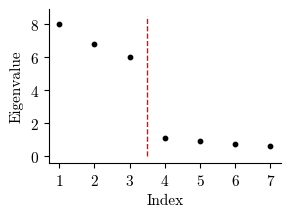

In [14]:
fig, ax=plt.subplots(figsize=(3,2))
ax.scatter(np.asarray(range(1,8)),[8, 6.8, 6, 1.1, 0.9, 0.7, 0.6], 10, color='k');
ax.set_ylabel("Eigenvalue");
ax.set_xlabel("Index");
ax.plot([3.5, 3.5], [0, 8.5], color='r', linestyle='--', linewidth=1);
ax.set_xticks([1,2,3,4,5,6,7]);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
if Save:
    fig.savefig(str(savedir / 'dimred-sample-scree.pdf'), dpi=600, format='pdf', bbox_inches='tight');

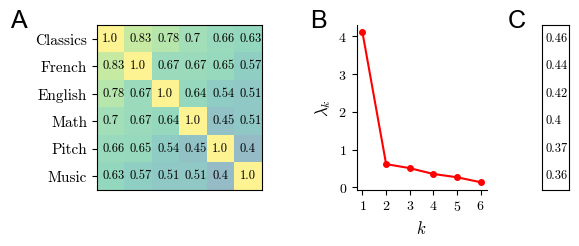

In [15]:
# Classics French English Math Pitch Music
C=np.array(
[[1.00,0.83,0.78,0.70,0.66,0.63],
[0.83,1.00,0.67,0.67,0.65,0.57],
[0.78,0.67,1.00,0.64,0.54,0.51],
[0.70,0.67,0.64,1.00,0.45,0.51],
[0.66,0.65,0.54,0.45,1.00,0.40],
[0.63,0.57,0.51,0.51,0.40,1.00]]
)

w,v=np.linalg.eigh(C) # eigenvalues & vectors in ascending order
u=v[:,-1] # top eigenvector
if u[0]<0:
    u=-u
u=np.reshape(u,(-1,1)) # turn into 6x1 array for display

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,ax=plt.subplots(1,3,figsize=(6,2.5),width_ratios=[3,1.5,0.5])

# divider=make_axes_locatable(ax[0])
# cax=divider.append_axes('right', size='5%', pad=0.05)
im=ax[0].imshow(C,vmin=0,vmax=1,alpha=0.5);
labels=['Classics','French','English','Math','Pitch','Music']
ax[0].set_yticks(np.arange(6));
ax[0].set_yticklabels(labels);
ax[0].set_xticks([]);
# fig.colorbar(im,cax=cax,orientation='vertical')
for i in range(6):
    for j in range(6):
        ax[0].text(i-0.3,j+0.1,C[i,j],fontsize=9)
        
plot(np.arange(1,7),w[-1::-1],fmts=['ro-'], linewidth=1.5, markersize=4, 
     xlabel=r'$k$',ylabel=r'$\lambda_k$',axes=ax[1]);
ax[1].set_xticks(np.arange(1,7))
ax[1].set_yticks(np.arange(5))
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[2].imshow(u,vmin=0,vmax=1,alpha=0.0)
for i in range(6):
    ax[2].text(-0.35,i+0.1,np.round(u[i,0],2), fontsize=9)
ax[2].set_xticks([])
ax[2].set_yticks([])

fig.text(0.02,0.9,'A',fontsize=18,font='Arial')
fig.text(0.52,0.9,'B',fontsize=18,font='Arial')
fig.text(0.85,0.9,'C',fontsize=18,font='Arial')
# fig.tight_layout()
if Save:
    fig.savefig(str(savedir / 'Spearman-PCA.pdf'), dpi=600, format='pdf', bbox_inches='tight');

In [16]:
# import scipy.linalg as la

# cov_matrix=np.asarray([[1,0.83,0.78,0.7,0.66,0.63],[0.83,1,0.67,0.67,0.65,0.57],[0.78,0.67,1,0.64,0.54,0.51],[0.7,0.67,0.64,1,0.45,0.51],[0.66,0.65,0.54,0.45,1,0.40],[0.63,0.57,0.51,0.51,0.40,1]])

# eigvals, eigvecs = la.eig(cov_matrix)
# eigvals=eigvals.real
# eigvals2=np.sort(eigvals)
# eigvals2=eigvals2[::-1]

# PC1=np.squeeze(eigvecs[eigvals==eigvals2[0]])
# PC1=PC1/(np.linalg.norm(PC1))

# fig, (a0, a1, a2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [4,4,1]}, figsize=(8,4))

# im=a0.imshow(cov_matrix, aspect="auto", vmin=0, vmax=1, cmap="RdBu_r")
# a0.set_xticks(np.arange(6))
# a0.set_yticks(np.arange(6))
# a0.set_yticklabels(('Classics', 'French', 'English', 'Math', 'Pitch', 'Music'))
# a0.set_xticklabels(('Classics', 'French', 'English', 'Math', 'Pitch', 'Music'))
# plt.colorbar(im,ax=a0)
# plt.setp(a0.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")
# a1.scatter(np.asarray(range(1,7,1)), eigvals2/sum(eigvals2), color='k')
# a1.set_ylabel("Fractional variance explained")
# a1.set_xlabel("Eigenvalue index")
# a2.imshow(np.transpose([PC1,]*10), aspect="auto", vmin=-1, vmax=1, cmap="RdBu_r")
# for i in range(6):
#     text = a2.text(5, i, round(PC1[i],2),
#                    ha="center", va="center", color="k")
# a2.axis('off')
# fig.tight_layout()
# fig.savefig(str(savedir / 'dimred-spearman-corr.pdf'), dpi=600, format='pdf', bbox_inches='tight');

#### Example: dimensionality reduction of neuronal population activity

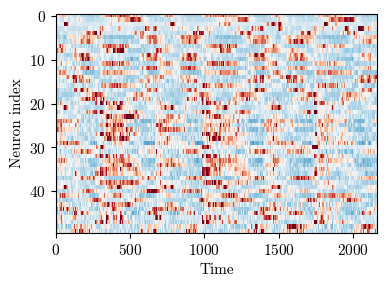

In [17]:
from scipy.stats import zscore

all_traces=np.load(str(datadir / "neuronal_population_traces.npy"))

fig, ax=plt.subplots(figsize=(4,3))
ax.imshow(zscore(all_traces, 1), aspect="auto", vmin=-3, vmax=3, cmap="RdBu_r", interpolation="none")
ax.set_ylabel("Neuron index")
ax.set_xlabel("Time")
fig.tight_layout()
if Save:
    fig.savefig(str(savedir / 'dimred-neur-activity.pdf'), dpi=600, format='pdf', bbox_inches='tight');

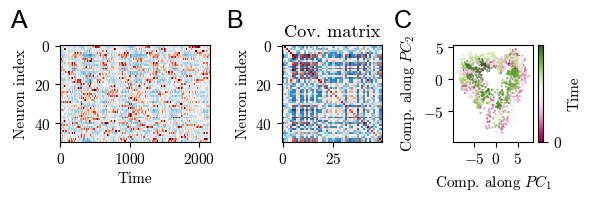

In [18]:

from scipy.sparse.linalg import eigs

all_traces=np.load(str(datadir / "neuronal_population_traces.npy"))
all_traces=zscore(all_traces, 1)

for i in range(all_traces.shape[1]):
    all_traces[:,i]=all_traces[:,i]-np.mean(all_traces[:,i],0)

fig, ax= plt.subplots(1,3,figsize=(6,2),width_ratios=[3,2,2])
ax[0].imshow(all_traces, aspect="auto", vmin=-3, vmax=3, cmap="RdBu_r", interpolation="none")
ax[0].set_ylabel("Neuron index")
ax[0].set_xlabel("Time")

C=np.matmul(all_traces,np.transpose(all_traces))

ax[1].imshow(C, aspect="auto", cmap="RdBu_r", interpolation="none")
ax[1].set_title("Cov. matrix")
ax[1].set_ylabel("Neuron index")

w,v=eigs(C,k=10,which='LR')

Loadings=np.zeros([5,all_traces.shape[1]])

for i in range(all_traces.shape[1]):
    Loadings[0,i]=np.dot(all_traces[:,i],v[:,0].real)
    Loadings[1,i]=np.dot(all_traces[:,i],v[:,1].real)
    Loadings[2,i]=np.dot(all_traces[:,i],v[:,2].real)
    Loadings[3,i]=np.dot(all_traces[:,i],v[:,3].real)
    Loadings[4,i]=np.dot(all_traces[:,i],v[:,4].real)
    
R=np.linspace(0,1,all_traces.shape[1])
R2=np.linspace(0,1,int(all_traces.shape[1]/2))

Rcolor=np.zeros([all_traces.shape[1],3])
for i in range(all_traces.shape[1]):
    if i<all_traces.shape[1]/2:
        Rcolor[i,0]=0
        Rcolor[i,1]=R2[-i]
        Rcolor[i,2]=0
    else:
        Rcolor[i,0]=R2[i-int(all_traces.shape[1]/2)]
        Rcolor[i,1]=0
        Rcolor[i,2]=R2[i-int(all_traces.shape[1]/2)]
        
im2=ax[2].scatter(Loadings[0,:],Loadings[1,:],s=0.1,c=R,cmap="PiYG")
ax[2].set_xlabel("Comp. along $PC_1$")
ax[2].set_ylabel("Comp. along $PC_2$")

fig.colorbar(im2,ax=ax[2],ticks=range(1),label='Time')


fig.text(0.02,0.9,'A',fontsize=18,font='Arial')
fig.text(0.38,0.9,'B',fontsize=18,font='Arial')
fig.text(0.66,0.9,'C',fontsize=18,font='Arial')

fig.tight_layout()
if Save:
    fig.savefig(str(savedir / 'dimred-neur-activity-new-old.pdf'), dpi=600, format='pdf', bbox_inches='tight');



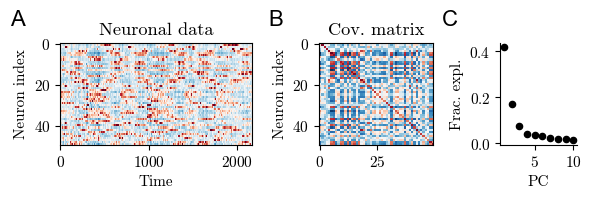

In [19]:

from scipy.sparse.linalg import eigs

all_traces=np.load(str(datadir / "neuronal_population_traces.npy"))
all_traces=zscore(all_traces, 1)

for i in range(all_traces.shape[1]):
    all_traces[:,i]=all_traces[:,i]-np.mean(all_traces[:,i],0)

fig, ax= plt.subplots(1,3,figsize=(6,2),width_ratios=[3,1.8,1.2])
ax[0].imshow(all_traces, aspect="auto", vmin=-3, vmax=3, cmap="RdBu_r", interpolation="none")
ax[0].set_ylabel("Neuron index")
ax[0].set_xlabel("Time")
ax[0].set_title("Neuronal data")

C=np.matmul(all_traces,np.transpose(all_traces))

ax[1].imshow(C, aspect="auto", cmap="RdBu_r", interpolation="none")
ax[1].set_title("Cov. matrix")
ax[1].set_ylabel("Neuron index")

t_variance=0
for i in range(all_traces.shape[1]):
    t_variance=t_variance+np.dot(all_traces[:,i],all_traces[:,i])

ax[2].scatter(list(range(1, len(w)+1)), w.real/t_variance, 20, color='k')
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_xlabel('PC')
ax[2].set_ylabel('Frac. expl.')


fig.text(0.02,0.9,'A',fontsize=16,font='Arial')
fig.text(0.45,0.9,'B',fontsize=16,font='Arial')
fig.text(0.74,0.9,'C',fontsize=16,font='Arial')


fig.tight_layout()
if Save:
    fig.savefig(str(savedir / 'dimred-neur-activity-new.pdf'), dpi=600, format='pdf', bbox_inches='tight');



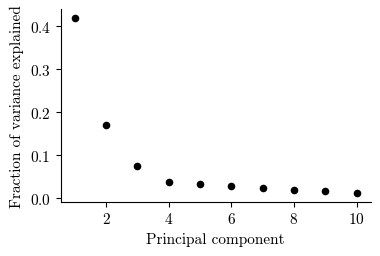

In [20]:
fig, ax = plt.subplots(figsize=(4,2.5))


t_variance=0
for i in range(all_traces.shape[1]):
    t_variance=t_variance+np.dot(all_traces[:,i],all_traces[:,i])

ax.scatter(list(range(1, len(w)+1)), w.real/t_variance, 20, color='k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Principal component')
plt.ylabel('Fraction of variance explained')
if Save:
    fig.savefig(str(savedir / 'dimred-neur-frac-var.pdf'), dpi=600, format='pdf', bbox_inches='tight');

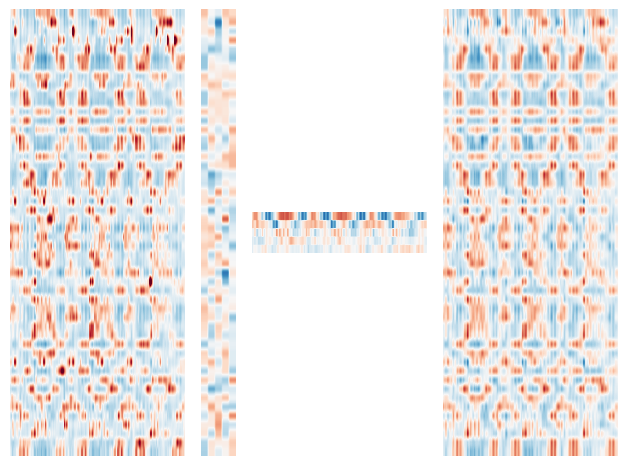

In [21]:
from scipy.stats import zscore
from sklearn.decomposition import PCA

pca=PCA(n_components=10)
principalComponents=pca.fit_transform(zscore(all_traces,1))

f, (a0, a1, a2, a3) = plt.subplots(1, 4, gridspec_kw={'width_ratios': [5, 1,5,5]})

a0.imshow(all_traces, aspect="auto", vmin=-3, vmax=3, cmap="RdBu_r")
a0.axis('off')
A=np.transpose([v[:,0].real,]*3)
B=np.transpose([v[:,1].real,]*3)
C=np.transpose([v[:,2].real,]*3)
D=np.transpose([v[:,3].real,]*3)
E=np.transpose([v[:,4].real,]*3)

a1.imshow(np.concatenate((A,B,C,D,E),axis=1), aspect="auto", vmin=-0.6, vmax=0.6, cmap="RdBu_r");
a1.axis('off');


np.concatenate(([pca.components_[0],]*100,[pca.components_[1],]*100))

a2.imshow(np.concatenate(([Loadings[0],]*100,[Loadings[1],]*100,[Loadings[2],]*100,[Loadings[3],]*100,[Loadings[4],]*100)), vmin=-10, vmax=10, cmap="RdBu_r");
a2.axis('off');

a3.imshow(np.outer(v[:,0].real,Loadings[0])+np.outer(v[:,1].real,Loadings[1])+np.outer(v[:,2].real,Loadings[2])+np.outer(v[:,3].real,Loadings[3])+np.outer(v[:,4].real,Loadings[4]), aspect="auto", vmin=-3, vmax=3, cmap="RdBu_r");

a3.axis('off');
f.tight_layout()

# f.savefig(str(savedir / 'dimred-neur-five-pc.pdf'), dpi=600, format='pdf', bbox_inches='tight');

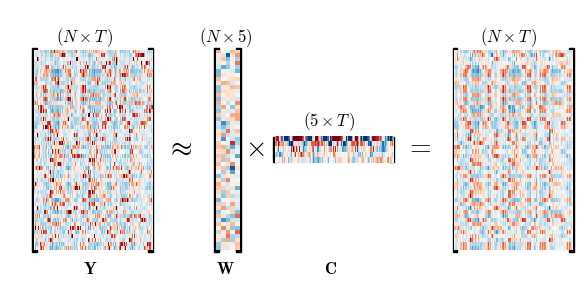

<Figure size 640x480 with 0 Axes>

In [22]:
from scipy.stats import zscore
from sklearn.decomposition import PCA
from matplotlib.patches import Rectangle


A=np.transpose([v[:,0].real,]*3)
B=np.transpose([v[:,1].real,]*3)
C=np.transpose([v[:,2].real,]*3)
D=np.transpose([v[:,3].real,]*3)
E=np.transpose([v[:,4].real,]*3)
f, ax = plt.subplots(1, 1, figsize=(6,3))

ax1 = ax.inset_axes([0, 0, 5, 5], transform = ax.transData)
ax.text(5.6,2.38,r'$\approx$',fontsize=20,color='k')
ax2 = ax.inset_axes([7.7, 0, 1, 5], transform = ax.transData)
ax.text(8.95,2.36,r'$\times$',fontsize=20,color='k')
ax3 = ax.inset_axes([10.2, 2, 5, 1], transform = ax.transData)
ax.text(15.7,2.4,r'$=$',fontsize=20,color='k')
ax4 = ax.inset_axes([17.8, 0, 5, 5], transform = ax.transData)

ax.text(2.1,-0.6,r'$\bf{Y}$',fontsize=12,color='k')
ax.text(7.7,-0.6,r'$\bf{W}$',fontsize=12,color='k')
ax.text(12.3,-0.6,r'$\bf{C}$',fontsize=12,color='k')

ax.text((2/3)*1.4,5.2,r'$(N\times T\,)$',fontsize=12,color='k')
ax.text(7,5.2,r'$(N\times 5)$',fontsize=12,color='k')
ax.text(11.4,3.1,r'$(5\times T\,)$',fontsize=12,color='k')
ax.text(18.9,5.2,r'$(N\times T\,)$',fontsize=12,color='k')
 
ax.add_patch(Rectangle((-0.05, -0.04), 0.2, 5.08,color='k'))
ax.add_patch(Rectangle((4.86, -0.04), 0.2, 5.08,color='k'))
ax.add_patch(Rectangle((7.65, -0.04), 0.2, 5.08,color='k'))
ax.add_patch(Rectangle((8.56, -0.04), 0.2, 5.08,color='k'))
ax.add_patch(Rectangle((10.12, 2.19), 0.2, 0.62,color='k'))
ax.add_patch(Rectangle((15.05, 2.19), 0.2, 0.62,color='k'))
ax.add_patch(Rectangle((17.74, -0.04), 0.2, 5.08,color='k'))
ax.add_patch(Rectangle((22.66, -0.04), 0.2, 5.08,color='k'))

ax1.imshow(all_traces, aspect="auto", vmin=-3, vmax=3, cmap="RdBu_r", interpolation="none")
ax2.imshow(np.concatenate((A,B,C,D,E),axis=1), aspect="auto", vmin=-0.5, vmax=0.5, cmap="RdBu_r", interpolation="none");
ax3.imshow(np.concatenate(([Loadings[0],]*100,[Loadings[1],]*100,[Loadings[2],]*100,[Loadings[3],]*100,[Loadings[4],]*100)), vmin=-5, vmax=5, cmap="RdBu_r", interpolation="none");
ax4.imshow(np.outer(v[:,0].real,Loadings[0])+np.outer(v[:,1].real,Loadings[1])+np.outer(v[:,2].real,Loadings[2])+np.outer(v[:,3].real,Loadings[3])+np.outer(v[:,4].real,Loadings[4]), aspect="auto", vmin=-3, vmax=3, cmap="RdBu_r", interpolation="none");

ax1.axis('off')
ax2.axis('off');
ax3.axis('off');
ax4.axis('off');

ax.set_xlim(-1,23)
ax.set_ylim(-0.5,6)
#ax.set_aspect('equal')
ax.axis('off')
f.tight_layout()
fig1=plt.gcf()
plt.show()
plt.draw()

if Save:
    fig1.savefig(str(savedir / 'dimred-neur-five-pc.pdf'), dpi=600, format='pdf', bbox_inches='tight');

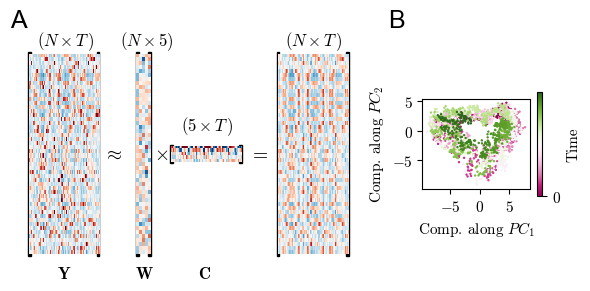

<Figure size 640x480 with 0 Axes>

In [23]:
from scipy.stats import zscore
from sklearn.decomposition import PCA
from matplotlib.patches import Rectangle


A=np.transpose([v[:,0].real,]*3)
B=np.transpose([v[:,1].real,]*3)
C=np.transpose([v[:,2].real,]*3)
D=np.transpose([v[:,3].real,]*3)
E=np.transpose([v[:,4].real,]*3)
f, ax = plt.subplots(1, 2, figsize=(6,3), gridspec_kw={'width_ratios': [2, 0.8]})

ax1 = ax[0].inset_axes([0, 0, 5, 5], transform = ax[0].transData)
ax[0].text(5.3,2.38,r'$\approx$',fontsize=14,color='k')
ax2 = ax[0].inset_axes([7.7, 0, 1, 5], transform = ax[0].transData)
ax[0].text(8.95,2.36,r'$\times$',fontsize=14,color='k')
ax3 = ax[0].inset_axes([10.2, 2, 5, 1], transform = ax[0].transData)
ax[0].text(15.7,2.4,r'$=$',fontsize=14,color='k')
ax4 = ax[0].inset_axes([17.8, 0, 5, 5], transform = ax[0].transData)

ax[0].text(2,-0.6,r'$\bf{Y}$',fontsize=12,color='k')
ax[0].text(7.6,-0.6,r'$\bf{W}$',fontsize=12,color='k')
ax[0].text(12.1,-0.6,r'$\bf{C}$',fontsize=12,color='k')

ax[0].text(0.6,5.2,r'$(N\times T\,)$',fontsize=12,color='k')
ax[0].text(6.5,5.2,r'$(N\times 5)$',fontsize=12,color='k')
ax[0].text(10.9,3.1,r'$(5\times T\,)$',fontsize=12,color='k')
ax[0].text(18.3,5.2,r'$(N\times T\,)$',fontsize=12,color='k')
 
ax[0].add_patch(Rectangle((-0.05, -0.04), 0.2, 5.08,color='k'))
ax[0].add_patch(Rectangle((4.86, -0.04), 0.2, 5.08,color='k'))
ax[0].add_patch(Rectangle((7.65, -0.04), 0.2, 5.08,color='k'))
ax[0].add_patch(Rectangle((8.56, -0.04), 0.2, 5.08,color='k'))
ax[0].add_patch(Rectangle((10.12, 2.28), 0.2, 0.45,color='k'))
ax[0].add_patch(Rectangle((15.05, 2.28), 0.2, 0.45,color='k'))
ax[0].add_patch(Rectangle((17.7, -0.04), 0.2, 5.08,color='k'))
ax[0].add_patch(Rectangle((22.66, -0.04), 0.2, 5.08,color='k'))

ax1.imshow(all_traces, aspect="auto", vmin=-3, vmax=3, cmap="RdBu_r", interpolation="none")
ax2.imshow(np.concatenate((A,B,C,D,E),axis=1), aspect="auto", vmin=-0.5, vmax=0.5, cmap="RdBu_r", interpolation="none");
ax3.imshow(np.concatenate(([Loadings[0],]*100,[Loadings[1],]*100,[Loadings[2],]*100,[Loadings[3],]*100,[Loadings[4],]*100)), vmin=-5, vmax=5, cmap="RdBu_r", interpolation="none");
ax4.imshow(np.outer(v[:,0].real,Loadings[0])+np.outer(v[:,1].real,Loadings[1])+np.outer(v[:,2].real,Loadings[2])+np.outer(v[:,3].real,Loadings[3])+np.outer(v[:,4].real,Loadings[4]), aspect="auto", vmin=-3, vmax=3, cmap="RdBu_r", interpolation="none");

ax1.axis('off')
ax2.axis('off');
ax3.axis('off');
ax4.axis('off');

ax[0].set_xlim(-1,23)
ax[0].set_ylim(-0.5,6)

ax[0].axis('off')

im2=ax[1].scatter(Loadings[0,:],Loadings[1,:],s=0.5,c=R,cmap="PiYG")
ax[1].set_xlabel("Comp. along $PC_1$")
ax[1].set_ylabel("Comp. along $PC_2$")
ax[1].set_aspect('equal')
fig.colorbar(im2,ax=ax[1],ticks=range(1),label='Time',shrink=0.4)


f.text(0.02,0.9,'A',fontsize=18,font='Arial')
f.text(0.65,0.9,'B',fontsize=18,font='Arial')

f.tight_layout()
f.add_subplot
fig1=plt.gcf()
plt.show()
plt.draw()

if Save:
    fig1.savefig(str(savedir / 'dimred-neur-five-pc2.pdf'), dpi=600, format='pdf', bbox_inches='tight');

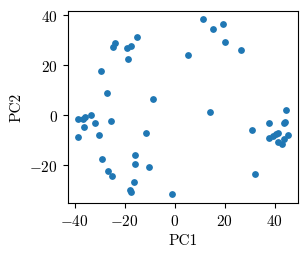

In [24]:
fig, ax=plt.subplots(figsize=(3,2.5))
ax.scatter(principalComponents[:,0],principalComponents[:,1],15)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_aspect('equal')

if Save:
    fig.savefig(str(savedir / 'dimred-neur-2pc-scatter.pdf'), dpi=600, format='pdf', bbox_inches='tight');

C:\Users\Younes\anaconda3\envs\r-reticulate\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Younes\anaconda3\envs\r-reticulate\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Younes\anaconda3\envs\r-reticulate\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Younes\anaconda3\envs\r-reticulate\lib\site-packages\sklearn\cluster\_

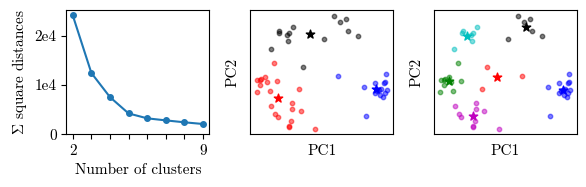

In [25]:
from sklearn.cluster import KMeans

distances=np.zeros((10,1))

for j in range(2,10,1):
    kmeans=KMeans(j,n_init=30).fit(principalComponents[:,0:2])
    Y=kmeans.labels_
    distances[j]=kmeans.inertia_

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,2))

ax1.plot(np.asarray(range(2,10,1)),distances[2:10],marker='o',markersize=4)
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel(r'$\Sigma$ square distances')
ax1.set_xticks([2,3,4,5,6,7,8,9],['2','','','','','','','9'])
ax1.set_yticks([0,10000,20000])
ax1.set_yticklabels(['0','1e4','2e4'])

kmeans=KMeans(3,n_init=30).fit(principalComponents[:,0:2])
Y=kmeans.labels_
Y3=Y
Z3=kmeans.cluster_centers_


for i in range(3):
    X=principalComponents[:,0:2]
    K=X[np.squeeze(Y==i),:]
    if i==0:
        ax2.scatter(K[:,0],K[:,1],10,'r',alpha=0.5)
        ax2.scatter(Z3[i,0],Z3[i,1],40,'r',marker='*')
    if i==1:
        ax2.scatter(K[:,0],K[:,1],10,'b',alpha=0.5)
        ax2.scatter(Z3[i,0],Z3[i,1],40,'b',marker='*')
    if i==2:
        ax2.scatter(K[:,0],K[:,1],10,'k',alpha=0.5)
        ax2.scatter(Z3[i,0],Z3[i,1],40,'k',marker='*')

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_xticks([])
ax2.set_yticks([])

kmeans=KMeans(6,n_init=30).fit(principalComponents[:,0:2])
Y=kmeans.labels_
Z6=kmeans.cluster_centers_
Y6=Y
Z=Z6


for i in range(6):
    X=principalComponents[:,0:2]
    K=X[np.squeeze(Y==i),:]
    if i==0:
        ax3.scatter(K[:,0],K[:,1],10,'r',alpha=0.5)
        ax3.scatter(Z[i,0],Z[i,1],40,'r',marker='*')
    if i==1:
        ax3.scatter(K[:,0],K[:,1],10,'b',alpha=0.5)
        ax3.scatter(Z[i,0],Z[i,1],40,'b',marker='*')
    if i==2:
        ax3.scatter(K[:,0],K[:,1],10,'k',alpha=0.5)
        ax3.scatter(Z[i,0],Z[i,1],40,'k',marker='*')
    if i==3:
        ax3.scatter(K[:,0],K[:,1],10,'g',alpha=0.5)
        ax3.scatter(Z[i,0],Z[i,1],40,'g',marker='*')
    if i==4:
        ax3.scatter(K[:,0],K[:,1],10,'c',alpha=0.5)
        ax3.scatter(Z[i,0],Z[i,1],40,'c',marker='*')
    if i==5:
        ax3.scatter(K[:,0],K[:,1],10,'m',alpha=0.5)
        ax3.scatter(Z[i,0],Z[i,1],40,'m',marker='*')

ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_xticks([])
ax3.set_yticks([])

fig.tight_layout()

if Save:
    fig.savefig(str(savedir / 'dimred-neur-kmeans.pdf'), dpi=600, format='pdf', bbox_inches='tight');

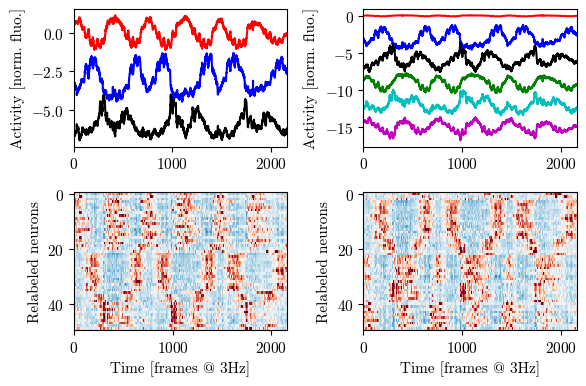

In [26]:
fig,((a0,a1),(a2,a3))=plt.subplots(2,2, figsize=(6,4))
ztraces=zscore(all_traces,1)

a0.plot(Z3[0,0]*pca.components_[0]+Z3[0,1]*pca.components_[1],'r')
a0.plot(Z3[1,0]*pca.components_[0]+Z3[1,1]*pca.components_[1]-3,'b')
a0.plot(Z3[2,0]*pca.components_[0]+Z3[2,1]*pca.components_[1]-6,'k')
a0.set_ylabel('Activity [norm. fluo.]')
a0.set_xlim(0,ztraces.shape[1])

a1.plot(Z6[0,0]*pca.components_[0]+Z6[0,1]*pca.components_[1],'r')
a1.plot(Z6[1,0]*pca.components_[0]+Z6[1,1]*pca.components_[1]-3,'b')
a1.plot(Z6[2,0]*pca.components_[0]+Z6[2,1]*pca.components_[1]-6,'k')
a1.plot(Z6[3,0]*pca.components_[0]+Z6[3,1]*pca.components_[1]-9,'g')
a1.plot(Z6[4,0]*pca.components_[0]+Z6[4,1]*pca.components_[1]-12,'c')
a1.plot(Z6[5,0]*pca.components_[0]+Z6[5,1]*pca.components_[1]-15,'m')
a1.set_ylabel('Activity [norm. fluo.]')
a1.set_xlim(0,ztraces.shape[1])

Zv1=ztraces[Y3==0,:]
Zv1b=np.zeros((1,ztraces.shape[1]))
Zv2=ztraces[Y3==1,:]
Zv3=ztraces[Y3==2,:]

traces_stacked=np.concatenate((Zv1,Zv2,Zv3),axis=0)

a2.imshow(traces_stacked, aspect="auto", vmin=-3, vmax=3, cmap="RdBu_r", interpolation="none");
a2.set_xlabel('Time [frames @ 3Hz]');
a2.set_ylabel('Relabeled neurons');

Zv1=ztraces[Y6==0,:]
Zv2=ztraces[Y6==1,:]
Zv3=ztraces[Y6==2,:]
Zv4=ztraces[Y6==3,:]
Zv5=ztraces[Y6==4,:]
Zv6=ztraces[Y6==5,:]

traces_stacked=np.concatenate((Zv1,Zv2,Zv3,Zv4,Zv5,Zv6),axis=0)

a3.imshow(traces_stacked, aspect="auto", vmin=-3, vmax=3, cmap="RdBu_r", interpolation="none");
a3.set_xlabel('Time [frames @ 3Hz]');
a3.set_ylabel('Relabeled neurons');
fig.tight_layout()
fig1=plt.gcf()

if Save:
    fig1.savefig(str(savedir / 'dimred-neur-cluster-traces.pdf'), dpi=600, format='pdf', bbox_inches='tight');

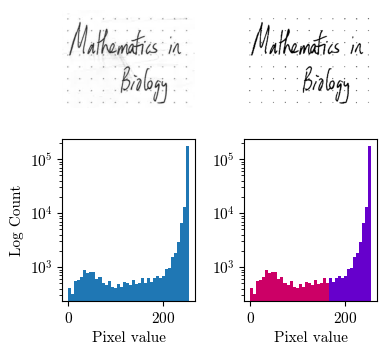

In [27]:
import matplotlib.image as mpimg

im = mpimg.imread(datadir / 'handwritten.png')
im_scaled = im*255
im_scaled = im_scaled.astype('uint8')

fig,((a0,a1),(a2,a3))=plt.subplots(2,2,figsize=(4,4))

a0.imshow(im_scaled, cmap='gray', vmin=0, vmax=255);
a0.axis("off");
X=np.asarray(im_scaled)

n, bins, patches = a2.hist(X.flatten(), 40)

a2.set_yscale('log');
a2.set_xlabel('Pixel value');
v6=a2.set_ylabel('Log Count');
# v5=a2.set_title(r'Histogram of pixel values');

kmeans=KMeans(2,n_init=30).fit(X.reshape(-1,1))
Y=kmeans.labels_
Z6=kmeans.cluster_centers_

Y2=Y.reshape(im.shape[0],im.shape[1]);
if Z6[1,0]>Z6[0,0]:
    X2=X.reshape(-1,1)
    X2[Y==1]=0
    thr=np.max(X2)
    Y2[Y2==1]=255
    Y2[Y2==0]=0

else:
    X2=X.reshape(-1,1)
    X2[Y==0]=0
    thr=np.max(X2)
    Y2[Y2==0]=255
    Y2[Y2==1]=0

a1.imshow(Y2, cmap='gray', vmin=0, vmax=255);
a1.axis("off");

bins2=np.zeros(bins.shape[0]-1)
for i in range(bins.shape[0]-1):
    bins2[i]=(bins[i]+bins[i+1])/2

b4=a3.bar(bins2[bins2<thr],n[bins2<thr],width=bins[1]-bins[0],color=[0.8,0,0.4]);
b5=a3.bar(bins2[bins2>thr],n[bins2>thr],width=bins[1]-bins[0],color=[0.4,0,0.8]);
v4=a3.set_yscale('log');
v3=a3.set_xlabel('Pixel value');
# v2=a3.set_ylabel('Log Counts');
# v1=a3.set_title(r'Histogram of pixel values');

fig.tight_layout();

if Save:
    fig.savefig(str(savedir / 'dimred-otsu-binarize.pdf'), dpi=600, format='pdf', bbox_inches='tight');

### Information theory

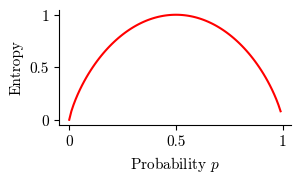

In [28]:
import math

x=np.zeros(100)
H=np.zeros(100)

for i in range(1, 100, 1):
    n=i/100
    x[i]=n
    H[i]=-n*math.log2(n)-(1-n)*math.log2(1-n)

fig, ax=plt.subplots(figsize=(3,1.5))
ax.set_xlabel(u"Probability $p$")
ax.set_ylabel("Entropy")
# ax.set_title("Entropy of a Bernoulli random variable as a function of its parameter")
ax.plot(x,H,'r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([0,0.5,1])
ax.set_xticklabels(['0','0.5','1'])
ax.set_yticks([0,0.5,1])
ax.set_yticklabels(['0','0.5','1'])
# fig.tight_layout()

if Save:
    fig.savefig(str(savedir / 'entropy-bernoulli.pdf'), dpi=600, format='pdf', bbox_inches='tight');

In [29]:
freqs=[8.2, 1.5, 2.8, 4.3, 13, 2.2, 2, 6.1, 7, 0.15, 0.77, 4, 2.4, 6.7, 7.5, 1.9, 0.095, 6, 6.3, 9.1, 2.8, 0.98, 0.24, 0.15, 2, 0.074]

entropy1=0
entropy2=0

for i in range(26):
    entropy1=entropy1-(1/26)*np.log2(1/26)
    entropy2=entropy2-(freqs[i]/100)*np.log2(freqs[i]/100)
print(u"Entropy H\u2080 = "+ str(entropy1))
print(u"Entropy H\u2081 = " + str(entropy2))

Entropy H₀ = 4.70043971814109
Entropy H₁ = 4.075352183088939
